In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dfB = pd.read_csv('Bozeman_limpio_final.csv')

In [3]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    567 non-null    int64  
 1   Unnamed: 0                      567 non-null    int64  
 2       last_scraped                567 non-null    object 
 3   source                          567 non-null    object 
 4   name                            567 non-null    object 
 5   description                     567 non-null    object 
 6   host_name                       567 non-null    object 
 7   host_since                      567 non-null    object 
 8   host_location                   567 non-null    object 
 9   host_about                      567 non-null    object 
 10  host_response_time              567 non-null    object 
 11  host_response_rate              567 non-null    object 
 12  host_acceptance_rate            567 

In [4]:
dfB = pd.read_csv('Bozeman_limpio_final.csv')
dfB.drop(columns=['    last_scraped','Unnamed: 0','Unnamed: 0.1', 'source', 'name', 'host_since', 'host_about', 'host_location', 'description', 'host_name', 'first_review', 'last_review'], inplace=True)



In [5]:
dfB.drop(columns=['neighbourhood_cleansed'], inplace=True)
#no hay variacion en esta columna, por lo que no aporta nada al modelo

In [10]:
dfB.head()
dfB.info()
#droppear last_scraped droppear source name host_since host_about host_location description host_name first_revie last_review
#dfM.drop(columns=['last_scraped', 'source', 'name', 'host_since', 'host_about', 'host_location', 'description', 'host_name', 'first_review', 'last_review'], inplace=True)
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              567 non-null    object 
 1   host_response_rate              567 non-null    object 
 2   host_acceptance_rate            567 non-null    float64
 3   host_is_superhost               567 non-null    object 
 4   host_verifications              567 non-null    object 
 5   host_has_profile_pic            567 non-null    object 
 6   host_identity_verified          567 non-null    object 
 7   neighbourhood_cleansed          567 non-null    object 
 8   property_type                   567 non-null    object 
 9   room_type                       567 non-null    object 
 10  amenities                       567 non-null    object 
 11  price                           567 non-null    float64
 12  has_availability                567 

## Quitar signos

In [7]:
dfB['host_response_rate'] = dfB['host_response_rate'].str.replace('%', '').astype(float)


In [8]:
unico_acceptance=np.unique(dfB['host_response_rate'])
unico_acceptance

array([  0.,  50.,  67.,  83.,  88.,  90.,  97.,  98.,  99., 100.])

## Convertir a dicotomicas

In [9]:
unico_acceptance=np.unique(dfB['host_response_rate'])
unico_acceptance

array([  0.,  50.,  67.,  83.,  88.,  90.,  97.,  98.,  99., 100.])

In [10]:
#saber la cantidad de cada respuesta 
dfB['host_response_rate'].value_counts()

host_response_rate
100.0    415
98.0      47
97.0      41
90.0      26
99.0      23
67.0       5
0.0        4
83.0       3
50.0       2
88.0       1
Name: count, dtype: int64

In [11]:
dfB['host_response_rate']=dfB['host_response_rate'].replace([100],"Respondio todas")
dfB['host_response_rate']=dfB['host_response_rate'].replace([0.,  50.,  67.,  83.,  88.,  90.,  97.,  98.,  99.],"No respondio todas")
dfB['host_response_rate'].value_counts()

host_response_rate
Respondio todas       415
No respondio todas    152
Name: count, dtype: int64

In [12]:
unico1=np.unique(dfB['host_response_time'])
unico1

array(['a few days or more', 'within a day', 'within a few hours',
       'within an hour'], dtype=object)

In [13]:
conteo_response_time = dfB['host_response_time'].value_counts()
conteo_response_time

host_response_time
within an hour        472
within a day           61
within a few hours     30
a few days or more      4
Name: count, dtype: int64

In [14]:
dfB['host_response_time']=dfB['host_response_time'].replace(['a few days or more', 'within a day', 'within a few hours'],"No in an hour")
dfB

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,amenities,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,No in an hour,Respondio todas,0.92,f,"['email', 'phone']",t,t,Entire home,Entire home/apt,"[""Refrigerator"", ""Private entrance"", ""Portable...",...,1,4.95,4.95,4.97,4.99,4.98,4.98,4.89,1,1.72
1,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Entire guesthouse,Entire home/apt,"[""Refrigerator"", ""Luggage dropoff allowed"", ""C...",...,5,4.97,4.98,4.95,4.97,4.99,4.93,4.94,2,3.92
2,within an hour,No respondio todas,0.99,t,"['email', 'phone']",t,t,Entire home,Entire home/apt,"[""Refrigerator"", ""Private entrance"", ""Carbon m...",...,1,4.76,4.89,4.82,4.95,4.97,4.97,4.70,3,0.30
3,within an hour,Respondio todas,0.92,t,"['email', 'phone']",t,f,Entire rental unit,Entire home/apt,"[""Refrigerator"", ""Portable fans"", ""Hangers"", ""...",...,0,4.96,5.00,5.00,5.00,4.98,5.00,4.73,2,0.47
4,within an hour,Respondio todas,1.00,t,"['email', 'phone']",t,t,Entire home,Entire home/apt,"[""Hangers"", ""Carbon monoxide alarm"", ""Free par...",...,2,4.77,4.87,4.90,4.91,4.83,4.89,4.73,1,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,No in an hour,No respondio todas,0.95,f,"['email', 'phone']",t,t,Entire rental unit,Entire home/apt,"[""TV"", ""Free parking on premises"", ""Dedicated ...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,1,2.10
563,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Entire home,Entire home/apt,"[""Radiant heating"", ""Luggage dropoff allowed"",...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,7,2.10
564,within an hour,Respondio todas,0.99,t,"['email', 'phone']",t,t,Entire rental unit,Entire home/apt,"[""Exterior security cameras on property"", ""Fir...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,8,2.10
565,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Entire home,Entire home/apt,"[""Refrigerator"", ""Luggage dropoff allowed"", ""P...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,7,2.10


In [15]:
unico1=np.unique(dfB['host_verifications'])
unico1

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['email']", "['phone']"], dtype=object)

In [16]:
conteo_valores = dfB['host_verifications'].value_counts()
conteo_valores


host_verifications
['email', 'phone']                  445
['email', 'phone', 'work_email']     95
['phone']                            25
['email']                             2
Name: count, dtype: int64

In [17]:
dfB['host_verifications']=dfB['host_verifications'].replace(["['email', 'phone']"],"Solo email y phone")
dfB['host_verifications']=dfB['host_verifications'].replace(["['work_email']", "['email', 'phone']",
       "['email']", "['phone']"],"Diversas verificaciones")
dfB

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,amenities,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,No in an hour,Respondio todas,0.92,f,Solo email y phone,t,t,Entire home,Entire home/apt,"[""Refrigerator"", ""Private entrance"", ""Portable...",...,1,4.95,4.95,4.97,4.99,4.98,4.98,4.89,1,1.72
1,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Entire guesthouse,Entire home/apt,"[""Refrigerator"", ""Luggage dropoff allowed"", ""C...",...,5,4.97,4.98,4.95,4.97,4.99,4.93,4.94,2,3.92
2,within an hour,No respondio todas,0.99,t,Solo email y phone,t,t,Entire home,Entire home/apt,"[""Refrigerator"", ""Private entrance"", ""Carbon m...",...,1,4.76,4.89,4.82,4.95,4.97,4.97,4.70,3,0.30
3,within an hour,Respondio todas,0.92,t,Solo email y phone,t,f,Entire rental unit,Entire home/apt,"[""Refrigerator"", ""Portable fans"", ""Hangers"", ""...",...,0,4.96,5.00,5.00,5.00,4.98,5.00,4.73,2,0.47
4,within an hour,Respondio todas,1.00,t,Solo email y phone,t,t,Entire home,Entire home/apt,"[""Hangers"", ""Carbon monoxide alarm"", ""Free par...",...,2,4.77,4.87,4.90,4.91,4.83,4.89,4.73,1,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,No in an hour,No respondio todas,0.95,f,Solo email y phone,t,t,Entire rental unit,Entire home/apt,"[""TV"", ""Free parking on premises"", ""Dedicated ...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,1,2.10
563,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Entire home,Entire home/apt,"[""Radiant heating"", ""Luggage dropoff allowed"",...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,7,2.10
564,within an hour,Respondio todas,0.99,t,Solo email y phone,t,t,Entire rental unit,Entire home/apt,"[""Exterior security cameras on property"", ""Fir...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,8,2.10
565,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Entire home,Entire home/apt,"[""Refrigerator"", ""Luggage dropoff allowed"", ""P...",...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,7,2.10


In [18]:
conteo_property = dfB['property_type'].value_counts()
conteo_property

property_type
Entire home                   189
Entire condo                  104
Entire rental unit            100
Entire townhouse               57
Entire guesthouse              37
Private room in home           23
Entire guest suite             20
Room in boutique hotel          5
Entire cottage                  5
Room in hostel                  4
Private room in townhouse       4
Private room in guesthouse      3
Entire loft                     3
Entire bungalow                 3
Private room in condo           2
Entire villa                    1
Entire place                    1
Shared room in hostel           1
Entire cabin                    1
Entire chalet                   1
Camper/RV                       1
Entire vacation home            1
Entire serviced apartment       1
Name: count, dtype: int64

In [19]:
unico2=np.unique(dfB['property_type'])
unico2

array(['Camper/RV', 'Entire bungalow', 'Entire cabin', 'Entire chalet',
       'Entire condo', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire home', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Private room in condo', 'Private room in guesthouse',
       'Private room in home', 'Private room in townhouse',
       'Room in boutique hotel', 'Room in hostel',
       'Shared room in hostel'], dtype=object)

In [20]:
#no entire HOME
dfB['property_type']=dfB['property_type'].replace(['Camper/RV', 'Entire bungalow', 'Entire cabin', 'Entire chalet',
       'Entire condo', 'Entire cottage', 'Entire guest suite',
       'Entire guesthouse', 'Entire loft', 'Entire place',
       'Entire rental unit', 'Entire serviced apartment',
       'Entire townhouse', 'Entire vacation home', 'Entire villa',
       'Private room in condo', 'Private room in guesthouse',
       'Private room in home', 'Private room in townhouse',
       'Room in boutique hotel', 'Room in hostel',
       'Shared room in hostel'],"no entire home")

In [24]:
conteo_room = dfB['room_type'].value_counts()
conteo_room

room_type
Entire home/apt    525
Private room        37
Hotel room           4
Shared room          1
Name: count, dtype: int64

In [23]:
unico4=np.unique(dfB['room_type'])
unico4

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [32]:
dfB['room_type']=dfB['room_type'].replace(['Hotel room', 'Private room', 'Shared room'],"No entire home")
dfB

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,No in an hour,Respondio todas,0.92,f,Solo email y phone,t,t,Bozeman,Entire home,Entire home/apt,...,1,4.95,4.95,4.97,4.99,4.98,4.98,4.89,1,1.72
1,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Bozeman,no entire home,Entire home/apt,...,5,4.97,4.98,4.95,4.97,4.99,4.93,4.94,2,3.92
2,within an hour,No respondio todas,0.99,t,Solo email y phone,t,t,Bozeman,Entire home,Entire home/apt,...,1,4.76,4.89,4.82,4.95,4.97,4.97,4.70,3,0.30
3,within an hour,Respondio todas,0.92,t,Solo email y phone,t,f,Bozeman,no entire home,Entire home/apt,...,0,4.96,5.00,5.00,5.00,4.98,5.00,4.73,2,0.47
4,within an hour,Respondio todas,1.00,t,Solo email y phone,t,t,Bozeman,Entire home,Entire home/apt,...,2,4.77,4.87,4.90,4.91,4.83,4.89,4.73,1,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,No in an hour,No respondio todas,0.95,f,Solo email y phone,t,t,Bozeman,no entire home,Entire home/apt,...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,1,2.10
563,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Bozeman,Entire home,Entire home/apt,...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,7,2.10
564,within an hour,Respondio todas,0.99,t,Solo email y phone,t,t,Bozeman,no entire home,Entire home/apt,...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,8,2.10
565,within an hour,Respondio todas,1.00,t,"['email', 'phone', 'work_email']",t,t,Bozeman,Entire home,Entire home/apt,...,0,4.90,4.90,4.90,4.90,4.90,4.90,4.80,7,2.10


In [38]:
conteo_availability= dfB['availability_30'].value_counts()
conteo_availability

availability_30
mayor a 15 dias    360
15 dias o menos    207
Name: count, dtype: int64

In [37]:
dfB['availability_30']=dfB['availability_30'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],"15 dias o menos")
dfB['availability_30']=dfB['availability_30'].replace([16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],"mayor a 15 dias")

In [42]:
conteo_accommodates= dfB['accommodates'].value_counts()
conteo_accommodates

accommodates
igual o menor al promedio    351
Mayor al promedio            216
Name: count, dtype: int64

In [40]:
dfB['accommodates']=dfB['accommodates'].replace([4.5],4)

In [ ]:

dfB['accommodates']=dfB['accommodates'].replace([1.0,2.0,3.0,4.0],"igual o menor al promedio")
dfB['accommodates']=dfB['accommodates'].replace([5.0,6.0,7.0,8.0,9.0,10.0],"Mayor al promedio")

## Convertir variables de objeto a numericas

In [45]:
conteo_amenities= dfB['amenities'].value_counts()
conteo_amenities

amenities
["Refrigerator", "Private entrance", "Hangers", "Carbon monoxide alarm", "Microwave", "Wifi", "TV with standard cable", "Stove", "Body soap", "Coffee maker", "Long term stays allowed", "Fire extinguisher", "Hair dryer", "Bed linens", "Essentials", "Dishwasher", "Dishes and silverware", "Dedicated workspace", "Toaster", "Elevator", "Breakfast", "Host greets you", "Iron", "Paid parking off premises", "Smoke alarm", "Pool", "Hot tub", "Air conditioning", "Shampoo", "Kitchen"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [46]:
#amenities
#room_type
# Crear una instancia de LabelEncoder
from sklearn.preprocessing import LabelEncoder

le4 = LabelEncoder()

# Ajustar y transformar la columna 'neighbourhood_cleansed'
dfB['amenities_encoded'] = le4.fit_transform(dfB['amenities'])+1

# Verificar el resultado
print(dfB[['amenities', 'amenities_encoded']])


                                             amenities  amenities_encoded
0    ["Refrigerator", "Private entrance", "Portable...                529
1    ["Refrigerator", "Luggage dropoff allowed", "C...                304
2    ["Refrigerator", "Private entrance", "Carbon m...                390
3    ["Refrigerator", "Portable fans", "Hangers", "...                382
4    ["Hangers", "Carbon monoxide alarm", "Free par...                 98
..                                                 ...                ...
562  ["TV", "Free parking on premises", "Dedicated ...                551
563  ["Radiant heating", "Luggage dropoff allowed",...                150
564  ["Exterior security cameras on property", "Fir...                 80
565  ["Refrigerator", "Luggage dropoff allowed", "P...                345
566  ["Refrigerator", "Heating - split type ductles...                281

[567 rows x 2 columns]


## Convertir Dicotomicas a Numericas

In [47]:
#convertid a numerica host_is_superhost
dfB['host_is_superhost'] = dfB['host_is_superhost'].map({'t': 1, 'f': 0})

In [48]:
#host_has_profile_pic
dfB['host_has_profile_pic'] = dfB['host_has_profile_pic'].map({'t': 1, 'f': 0})

In [49]:
#host_identity_verified
dfB['host_identity_verified'] = dfB['host_identity_verified'].map({'t': 1, 'f': 0})

In [50]:
#has_availability
dfB['has_availability'] = dfB['has_availability'].map({'t': 1, 'f': 0})

In [51]:
#instant_bookable
dfB['instant_bookable'] = dfB['instant_bookable'].map({'t': 1, 'f': 0})

In [52]:
dfB['host_response_rate'] = dfB['host_response_rate'].map({'Respondio todas': 1, 'No respondio todas': 0})

In [53]:
dfB['host_response_time'] = dfB['host_response_time'].map({'within an hour': 1, 'No in an hour': 0})

In [54]:
dfB['host_verifications'] = dfB['host_verifications'].map({'Solo email y phone': 1, 'Diversas verificaciones': 0})


In [56]:
#'Entire home', 'no entire home'
dfB['property_type'] = dfB['property_type'].map({'Entire home': 1, 'no entire home': 0})

In [57]:
dfB['room_type'] = dfB['room_type'].map({'Entire home/apt': 1, 'No entire home': 0})

In [61]:
dfB['availability_30'] = dfB['availability_30'].map({'mayor a 15 dias': 1, '15 dias o menos': 0})

In [58]:

dfB['accommodates'] = dfB['accommodates'].map({'Mayor al promedio': 1, 'igual o menor al promedio': 0})

## HEATMAP


In [59]:
#droppear columnas 0,4,7,8,9,10
dfB.drop(columns=['amenities',], inplace=True)
#dfM.drop(columns=['number_of_reviews_l30d','availability_30','availability_60' , 'availability_90','availability_365'], inplace=True)


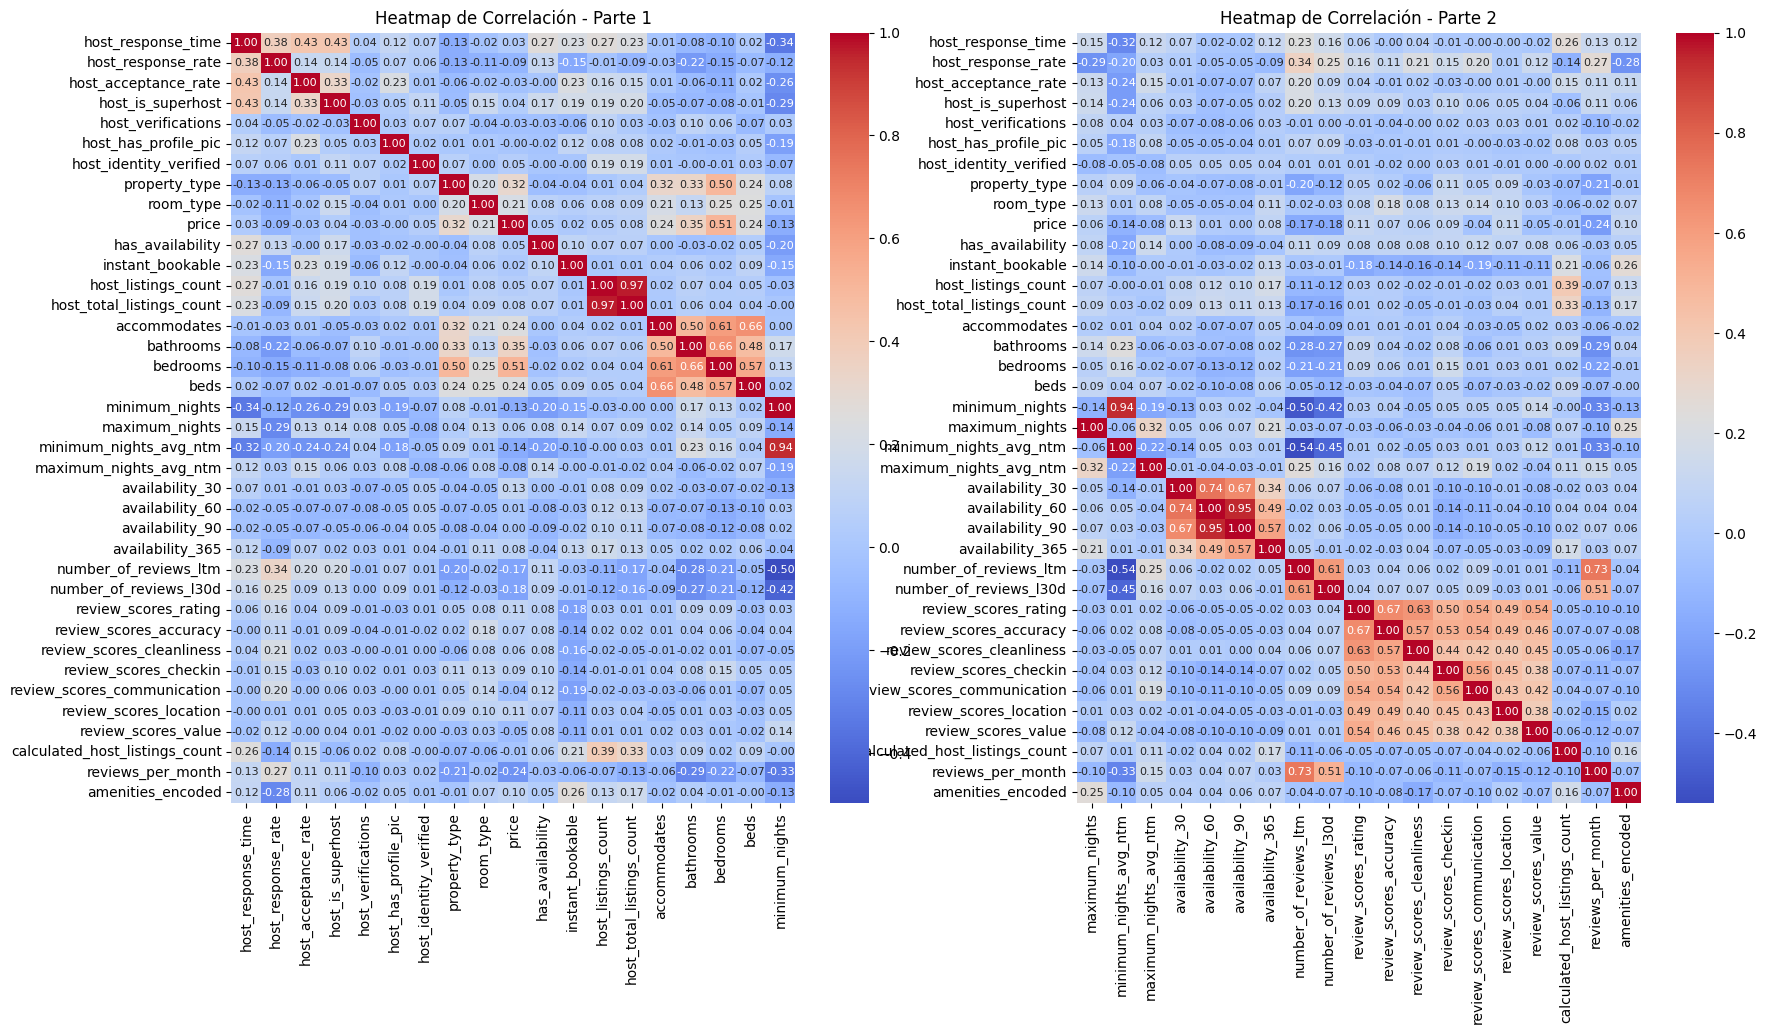

In [62]:
corr_matrix = dfB.corr()
num_columns = corr_matrix.shape[1]

# Dividir la matriz de correlación en dos partes
corr_matrix_1 = corr_matrix.iloc[:, :num_columns // 2]
corr_matrix_2 = corr_matrix.iloc[:, num_columns // 2:]
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 10))  # Ajusta el tamaño según tus necesidades

# Heatmap para la primera mitad de la matriz de correlación
sns.heatmap(corr_matrix_1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[0],annot_kws={"size": 8})
ax[0].set_title('Heatmap de Correlación - Parte 1')

# Heatmap para la segunda mitad de la matriz de correlación
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax[1],annot_kws={"size": 8})
ax[1].set_title('Heatmap de Correlación - Parte 2')

plt.show()

In [63]:
#crear un archivo csv del dfM
dfB.to_csv('Bozeman_V1.csv', index=False)